---

# Single Neuron Model on Classification of Gender by Voice of healthy individuals 

## Background

# Perceptron-Based Gender Voice Classification

In this project, we will develop a perceptron model, one of the simplest types of artificial neural networks, to classify audio recordings into male or female voices. 

The biological differences between male and female voices primarily lie in pitch and formant frequencies. **Typically, male voices have a lower pitch and different formant frequencies compared to female voices due to variations in vocal tract and larynx size.** These acoustic features can be quantified and used as inputs to our perceptron, enabling it to learn and predict the gender associated with a voice recording. This approach not only serves as a practical application of machine learning in the field of voice speech language pathology but also provides insights into how gender characteristics influence voice acoustics.

<p align="center">
    <img src="gender voice.jpg" width="300">
</p>


# Understanding Voice and Gender: Why does this matter? 

Generally speaking, the human ear uses the pitch of voices as a reference for gender identification. In clinical terms, "pitch" is perceived as both mean frequency and fundamental frequency. As speech-language pathologists specializing in voice, I provide services for individuals seeking to modify their voice to better align with their gender identity. This service is known as **voice feminization** or **voice masculinization.**

## Techniques for Voice Modification

One of the primary techniques we use involves teaching clients how to modify the pitch at which they speak. This adjustment is tailored to each individual and progresses incrementally.

## Voice Evaluation Parameters


During voice evaluation, we establish a range for male and female voice frequencies. For instance:
- **The fundamental frequency (F0) range for a female voice: 160 Hz to 270 Hz.**
- **For a male voice, from 80 Hz to 175 Hz.**

<p align="center">
    <img src="phonation_vowel.png" width="500">
</p>

Fundamental frequency is measured through a 3-5 five-second long sustained phonation "Ahh". This frequency is a crucial criterion for voice evaluation, not only because it represents an aspect of our gender identity but also because variations in pitch can indicate potential vocal damage. For example:
- An irregularly low pitch voice may signal damage to the pitch-controlling nerve, a common side effect of thyroid surgery.
- Additionally, puberphonia, a disorder where males post-puberty retain a high-pitched voice akin to that of preadolescent boys, can also be detected through these evaluations.

## Acoustic Parameters in Voice Evaluation

Voice evaluation often utilizes a variety of acoustic parameters to assess and characterize voice quality. These parameters provide quantifiable measures that are crucial in the fields of speech-language pathology and voice therapy. Below are some of the primary acoustic parameters used in voice evaluation:

### Fundamental Frequency (F0)

- **Description**: Fundamental frequency, often denoted as F0, represents the lowest frequency of a voice's harmonic series. It is generally perceived as the "pitch" of the voice.
- **Gender Differences**: In adults, typical male voices have a lower F0 compared to female voices. For instance, average F0 values for adult males range from approximately 85 to 155 Hz, while for adult females, the range is about 165 to 255 Hz during sustained phonation tasks. This difference is primarily due to the larger size and mass of the male vocal folds, which vibrate at a slower rate.

### Mean Frequency

- **Description**: Mean Frequency, often expressed as the average frequency across a given speech sample, measures the central tendency of the frequency distribution of the voice signal. Unlike specific formant frequencies which relate to the resonant frequencies of the vocal tract, Mean Frequency encompasses the entire range of frequencies generated during speech. It is computed by averaging all frequencies present in the speech spectrum during a particular speaking task, such as spontaneous speech or reading aloud.

- **Measurement**: This measure can be obtained using spectral analysis techniques that break down the speech signal into its frequency components. In tasks like spontaneous speech or reading, where the speech flow is continuous and dynamic, spectral analysis tools track the frequency values across the entire speech segment and compute their average. 

- **Distinguishing from Mean Fundamental Frequency (F0)**: While "Mean Frequency" refers to the average of all frequencies in a speech sample, "Mean Fundamental Frequency" specifically refers to the average of the lowest frequencies in the speech that are repetitive (fundamental frequencies of the vocal fold vibrations). F0 provides a specific measure related to pitch, whereas Mean Frequency gives a broader view of the voice's frequency content, including both harmonic (voice-related) and non-harmonic parts (noise or other sounds).

- **Gender Differences**: Typically, males have a lower Mean Frequency as well as a lower Mean Fundamental Frequency compared to females, reflecting differences in vocal fold size and vocal tract length. However, Mean Frequency captures a wider range of the spectral content, which can vary significantly depending on the speaking context and vocal effort, beyond anatomical differences.


## The Dataset

This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz (human vocal range).

Dataset Source: [Gender Recognition by Voice (Kaggle)](https://www.kaggle.com/datasets/primaryobjects/voicegender)



## Dataset Exploration

In [162]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from mlxtend.plotting import plot_decision_regions


In [163]:

df = pd.read_csv('/Users/ruiqingfan/Documents/INDE-577-24/INDE-577-24-1/gender_voice.csv', delimiter=',')
df.dataframeName = 'gender voice.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

df.head(5)

There are 3168 rows and 21 columns


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


### Choosing two variable in the dataset for perceptron training

Given their clinical relavence, the **'meanfreq'** and the **'meanfun'** were selected for training of gender classification via voice. 

Visualization was made to see if the two varibales are linearly seperable.   

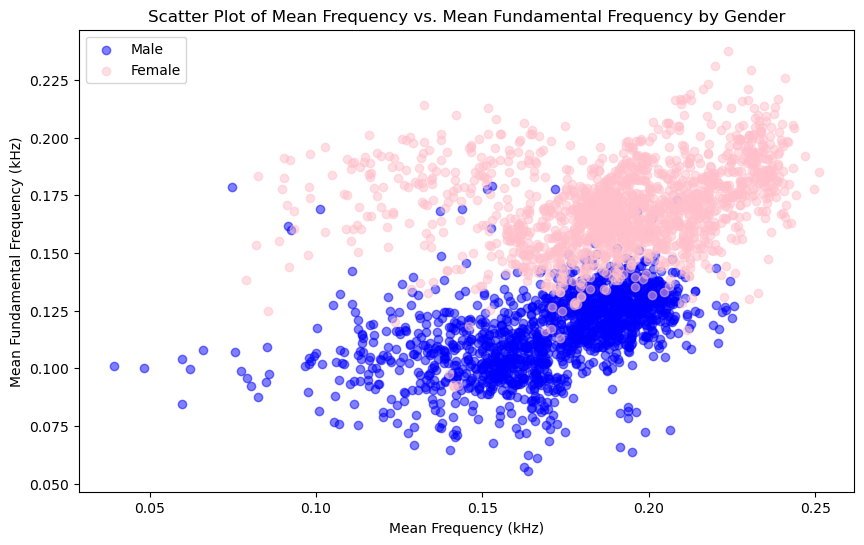

In [164]:

plt.figure(figsize=(10, 6))  # Setting the figure size
plt.scatter(male['meanfreq'], male['meanfun'], color='blue', label='Male', alpha=0.5)
plt.scatter(female['meanfreq'], female['meanfun'], color='pink', label='Female', alpha=0.5)
# Adding axis labels
plt.xlabel('Mean Frequency (kHz)')
plt.ylabel('Mean Fundamental Frequency (kHz)')

# Adding a plot title
plt.title('Scatter Plot of Mean Frequency vs. Mean Fundamental Frequency by Gender')

# Adding a legend to the plot
plt.legend()

# Show the plot
plt.show()


### Cleaning the dataset. 

Outlineer of male voices (with high mean fundamental frequency) is found under the pink dots representing female voices. Same case for the cluster of male voices. 


Given the clinical fundamental frequency norms and this visualization, outliners of male and female voice are cleaned. 



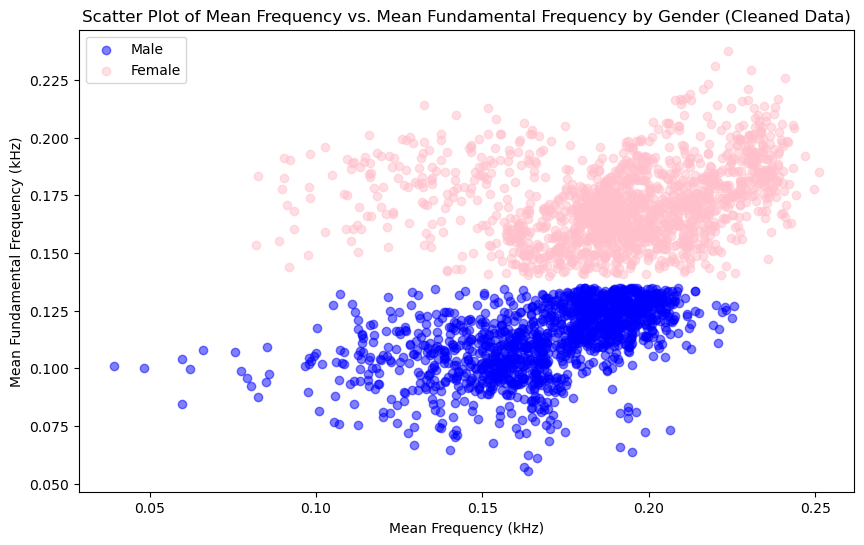

In [253]:
filtered_females = df[(df['label'] == 'female') & (df['meanfun'] > 0.140)]

# Keep males with 'meanfun' < 0.138
filtered_males = df[(df['label'] == 'male') & (df['meanfun'] < 0.135)]

# Concatenate the two filtered DataFrames to get the final cleaned DataFrame
cleaned_df = pd.concat([filtered_females, filtered_males])
# Splitting the cleaned DataFrame based on gender for plotting
cleaned_male = cleaned_df[cleaned_df['label'] == 'male']
cleaned_female = cleaned_df[cleaned_df['label'] == 'female']

# Creating the scatter plot
plt.figure(figsize=(10, 6))  # Setting the figure size
plt.scatter(cleaned_male['meanfreq'], cleaned_male['meanfun'], color='blue', label='Male', alpha=0.5)
plt.scatter(cleaned_female['meanfreq'], cleaned_female['meanfun'], color='pink', label='Female', alpha=0.5)

# Adding axis labels
plt.xlabel('Mean Frequency (kHz)')
plt.ylabel('Mean Fundamental Frequency (kHz)')

# Adding a plot title
plt.title('Scatter Plot of Mean Frequency vs. Mean Fundamental Frequency by Gender (Cleaned Data)')

# Adding a legend to the plot
plt.legend()

# Show the plot
plt.show()

In [254]:
# Store the gender label in the numpy array y
y = cleaned_df['label'].values

# Convert each entry of y: 'male' to 1 and 'female' to 2
y = np.where(y == 'male', -1, 1)

X = cleaned_df[["meanfreq", "meanfun"]].iloc[:3168].values


In [257]:
class Perceptron(object):
    def __init__(self, eta = .5, epochs=50):
        self.eta = eta
        self.epochs = epochs
        
    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                errors += int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [271]:
# Instantiate one instance of the Perceptron class
clf = Perceptron(epochs =500)

# Call the train method to train the weights and bias of the given instance
clf.train(X, y)

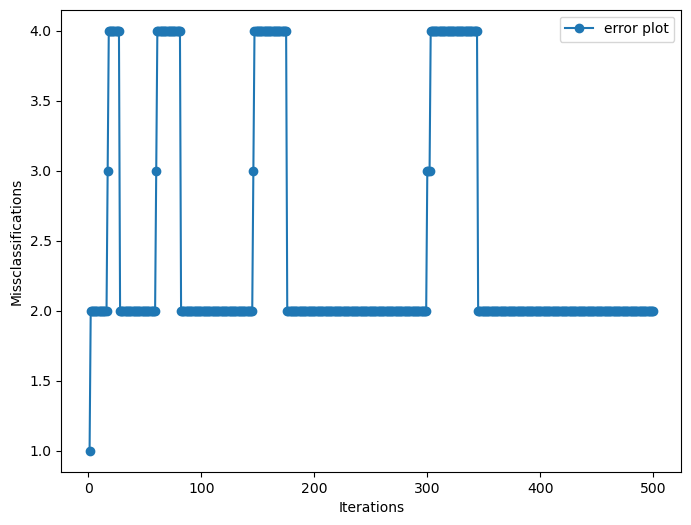

In [272]:
plt.figure(figsize = (8, 6))
plt.plot(range(1, len(clf.errors_)+1), clf.errors_, 
         marker = "o",
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()

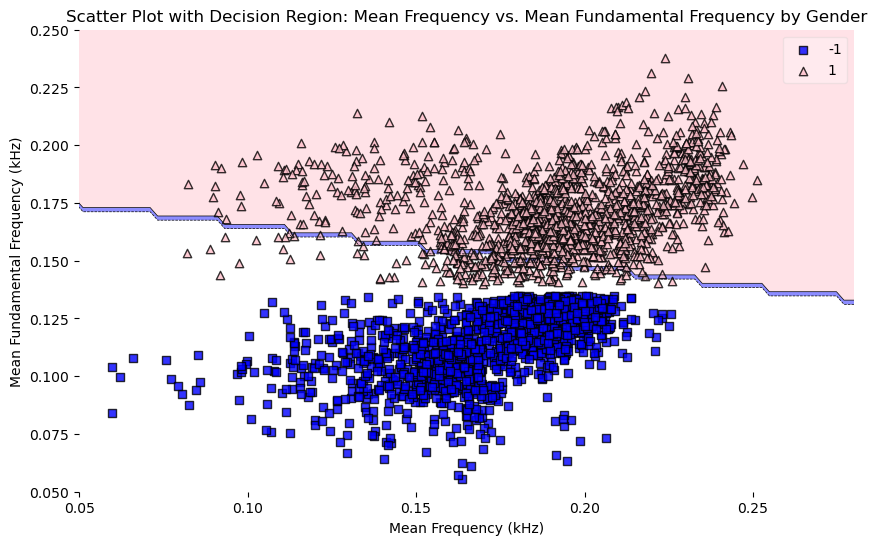

In [274]:
plt.figure(figsize=(10, 6))
plot_decision_regions(X, y, clf=clf, legend=2, colors='blue,pink')

# Adding labels and title
plt.xlabel('Mean Frequency (kHz)')
plt.ylabel('Mean Fundamental Frequency (kHz)')
plt.title('Scatter Plot with Decision Region: Mean Frequency vs. Mean Fundamental Frequency by Gender')

plt.xlim(0.05, 0.28)
plt.ylim(0.05, 0.25)

# Handling the legend: Extract handles and labels, then re-add them
handles, labels = plt.gca().get_legend_handles_labels()
# Since `plot_decision_regions` may add extra items to the legend, you can filter or select which to display
plt.legend(handles[-3:], labels[-3:], framealpha=0.3)  # Adjust indexing based on your actual data

plt.show()